- IMPORT THE LIBRARIES YOU WILL USE
------------------------------------------
You only need to import packages one time per notebook session. To keep your
notebook clean and organized you can handle all imports at the top of your file.
The following are included for example purposed, feel free to modify or delete 
anything in this section.

In [1]:
import os
import csv
#import pandas as pd
import pandas
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

In [2]:
get_ipython().system('pip install lightgbm')
import db_dtypes
import lightgbm as lgb
#print("OK")

ModuleNotFoundError: No module named 'lightgbm'

In [3]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [4]:
!pip install db-dtypes

In [5]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.prediction_list`
"""

In [6]:
query_job = bigquery_client.query(query)
df_unemployment = query_job.to_dataframe()
df_unemployment.head()

,uu_id,week_number
0,5bf51fc2e162d6faf9e3cf79e4198378,44
1,420b44cc7e3f55d738df565421e59941,44
2,e39c66ecceec76ee8f9f811fa4a2d246,44
3,a90462cd11ae4e43144239bf7c4828a4,44
4,8b20a6749088c7ff1237983076ebfeaa,44


In [7]:
!pip install db-dtypes
query_unemployment = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data` 
"""
query = bigquery_client.query(query_unemployment)
df_unemployment = query.to_dataframe()
df_unemployment.head()

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,<NA>,14,...,<NA>,<NA>,0,0,0,11,0,0,<NA>,<NA>
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0,<NA>,108,...,76,35,0,0,0,<NA>,<NA>,0,0,0
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0,<NA>,<NA>,...,<NA>,<NA>,0,0,0,39,0,0,0,0
3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0,<NA>,<NA>,...,<NA>,<NA>,0,0,<NA>,10,0,0,<NA>,<NA>
4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0,<NA>,69,...,90,65,0,0,0,135,<NA>,<NA>,<NA>,<NA>


In [8]:
query_wage = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.wage_data`
"""
query = bigquery_client.query(query_wage)
df_wage = query.to_dataframe()
df_wage.head()

,uu_id,countyfips,tract,tract_name,average_wage
0,585f8731c2255d6b3f817a31180848b9,18177,200,"Census Tract 2, Wayne County, Indiana",6612.000000
1,8c9d2aa90948679972a9382aadcc6001,18177,900,"Census Tract 9, Wayne County, Indiana",9883.250000
2,0f3d45341a5b113b813ffb7be7f58bab,18183,50300,"Census Tract 503, Whitley County, Indiana",13992.250000
3,fb55464f8e34af6d750d06968bf719b8,18183,50400,"Census Tract 504, Whitley County, Indiana",13613.500000
4,983badfd7b568728e39a2344a9006078,18001,30200,"Census Tract 302, Adams County, Indiana",11816.666667


In [9]:
query_pred_list = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.prediction_list`
"""
query = bigquery_client.query(query_pred_list)
df_pred_list = query.to_dataframe()
df_pred_list.head()

,uu_id,week_number
0,5bf51fc2e162d6faf9e3cf79e4198378,44
1,420b44cc7e3f55d738df565421e59941,44
2,e39c66ecceec76ee8f9f811fa4a2d246,44
3,a90462cd11ae4e43144239bf7c4828a4,44
4,8b20a6749088c7ff1237983076ebfeaa,44


In [10]:
query_schema = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.INFORMATION_SCHEMA.TABLES`
"""
query = bigquery_client.query(query_schema)
df_schema = query.to_dataframe()
df_schema.head()

,table_catalog,table_schema,table_name,table_type,is_insertable_into,is_typed,creation_time,base_table_catalog,base_table_schema,base_table_name,snapshot_time_ms,ddl,default_collation_name,upsert_stream_apply_watermark
0,ironhacks-data,ironhacks_competition,wage_data,BASE TABLE,YES,NO,2022-11-29 17:00:10.578000+00:00,None,None,None,NaT,CREATE TABLE `ironhacks-data.ironhacks_competi...,NULL,NaT
1,ironhacks-data,ironhacks_competition,prediction_list,BASE TABLE,YES,NO,2022-11-29 17:00:10.722000+00:00,None,None,None,NaT,CREATE TABLE `ironhacks-data.ironhacks_competi...,NULL,NaT
2,ironhacks-data,ironhacks_competition,unemployment_data,BASE TABLE,YES,NO,2022-11-29 17:00:14.588000+00:00,None,None,None,NaT,CREATE TABLE `ironhacks-data.ironhacks_competi...,NULL,NaT


In [11]:
df_unemployment.shape
df_wage.shape
df_schema.shape
df_pred_list.shape

(525, 2)

In [12]:
print(df_unemployment.shape)
print(df_wage.shape)
print(df_schema.shape)
print(df_pred_list.shape)

(16833, 25)
(525, 5)
(3, 14)
(525, 2)


In [13]:
print(df_unemployment.shape)
print(df_wage.shape)
print(df_pred_list.shape)
print(df_schema.shape)

(16833, 25)
(525, 5)
(525, 2)
(3, 14)


In [14]:
print("OK")

OK


In [15]:
print(df_pred_list["uu_id"].unique())

['5bf51fc2e162d6faf9e3cf79e4198378' '420b44cc7e3f55d738df565421e59941'
 'e39c66ecceec76ee8f9f811fa4a2d246' 'a90462cd11ae4e43144239bf7c4828a4'
 '8b20a6749088c7ff1237983076ebfeaa' '489a93264d03adecc4589fd9cd34ad36'
 'f61f291c865fe4fe2bfd6dad53e5d058' 'f4520092ddd64f380cc29f27329112a6'
 '447d5984bb8a8179bff002ccd1bba162' '56d73815bdda97aca8e26051183ed3ba'
 '050a624d618a68e43fe31189909c644f' '5c43cbf8f0d860e91a9160706ea9b7d8'
 '1400fd6122c6fe7582a30ee1280beb4b' '02a7b845ab6b3fc2c09a50cdc486db2a'
 'a993d47c7143bed2a187b0cac7d17983' '09fbf26479f644ad33186ec51a90d65d'
 'ce8723e47ce346b09bc20deb5d27749e' 'b67c2c4abede3730932f8d53aba0341a'
 '68e5bdd9fde563b534c8a38dfddb6146' '445ccda085809824099ff41f0ed427e5'
 '5a2c726a9af1492d08478394a7938cc8' 'e7e08825e5ce14c08ad265c2bfc40227'
 'd42203d57e7b727be6c74adb6ec01f29' '627f0516c61e02f14a399ff99aaf141c'
 '676fffaaecefffe4ce93ca264c5c3c36' '7322dfe92403d20403f7a527ba733641'
 'd6a4947ec7c2a78bd32ba4e30f3bba53' '1ba8e8f6caf333a10ab33d1add51b960'
 'a0e4

In [16]:
print(df_pred_list["week_number"].unique())

<IntegerArray>
[44]
Length: 1, dtype: Int64


In [17]:
print(df_pred_list["week_number"].unique().size) # 39

1


In [18]:
print(df_unemployment["uu_id"].unique().size) # 39

525


In [19]:
print(df_unemployment["week_number"].unique().size) # 39

35


In [20]:
print(df_unemployment["week_number"].unique())  

<IntegerArray>
[16, 12, 13, 29, 15, 34,  5, 24, 19, 28, 37, 36, 27, 26, 21, 20, 22,  9,  3,
 32, 11, 14, 17,  6, 35,  7, 31,  1, 10, 30, 33,  2, 18,  8, 25]
Length: 35, dtype: Int64


In [21]:
print(df_unemployment["week_number"].unique().sort())  

AttributeError: 'IntegerArray' object has no attribute 'sort'

In [22]:
print(sorted(df_unemployment["week_number"].unique())) # 35

[1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]


In [23]:
df_three_col = df_unemployment[["uu_id", "week_number", "total_claims"]]

In [24]:
df_three_col.head()

,uu_id,week_number,total_claims
0,f013068de98db1470bd986137a0c6d23,16,22
1,21957d5517323845818d87623589e1ba,12,111
2,6a5609f385912113b6f1014b958ed748,13,39
3,46b2882ec4c373527ec33f7bd4f1388d,29,14
4,37495d17e82f7df326bfc2c4c090f7b7,15,155


In [25]:
df_three_col.shape

(16833, 3)

In [26]:
test_data = df_three_col[df_three_col["uu_id"].isin(['26c71b31d464bc7bedc8aed7e5c6e641', 'd0808351616eaf2e1d5d36d52e6cb669', '241f741bee0eb0ce595304d106811776'])  ]
test_data.shape

(120, 3)

- IMPORT THE LIBRARIES YOU WILL USE
------------------------------------------
You only need to import packages one time per notebook session. To keep your
notebook clean and organized you can handle all imports at the top of your file.
The following are included for example purposed, feel free to modify or delete 
anything in this section.

In [27]:
import os
import csv
#import pandas as pd
import pandas
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

In [28]:
get_ipython().system('pip install lightgbm')
import db_dtypes
import lightgbm as lgb
#print("OK")

ModuleNotFoundError: No module named 'lightgbm'

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [30]:
seaborn.lmplot(x="week_number", y = "total_claims", hue = "uu_id", data = test_data)

NameError: name 'seaborn' is not defined

UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

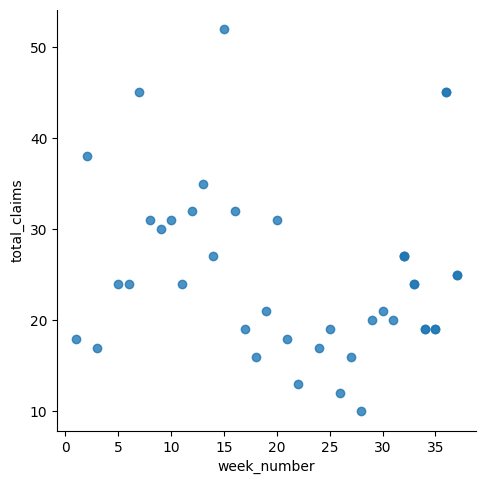

In [31]:
sns.lmplot(x="week_number", y = "total_claims", hue = "uu_id", data = test_data)

In [32]:
#sns.lmplot(x="week_number", y = "total_claims", hue = "uu_id", data = test_data)
sns.scatterplot(data = test_data, x = 'week_number', y = 'total_claims', data =  'uu_id')

SyntaxError: keyword argument repeated: data (2143231646.py, line 2)

<AxesSubplot: xlabel='week_number', ylabel='total_claims'>

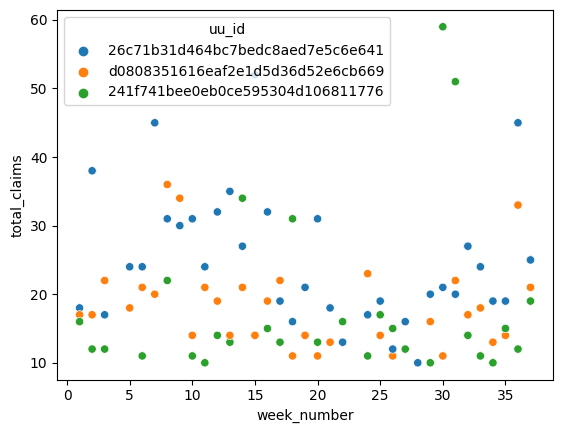

In [33]:
#sns.lmplot(x="week_number", y = "total_claims", hue = "uu_id", data = test_data)
sns.scatterplot(data = test_data, x = 'week_number', y = 'total_claims', hue =  'uu_id')

In [34]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [35]:
logreg.fit(test_data["week_number"], test_data["total_claims"])

NameError: name 'logreg' is not defined

In [36]:
y_pred = logreg.predict(39)
print(y_pred)

NameError: name 'logreg' is not defined

In [37]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [38]:
logisticRegr.fit(test_data["week_number"], test_data["total_claims"])

ValueError: Expected 2D array, got 1D array instead:
array=[34. 15. 21. 34.  7.  2. 35. 35. 20. 25. 36. 36. 12. 19.  6. 19. 32.  7.
 32. 24. 32. 30. 29. 27. 26.  6. 28. 24.  1.  5. 13. 25. 31. 15. 14. 20.
 37.  2. 33. 21. 35. 35. 37.  1. 19. 33. 37. 37. 32. 29. 32. 32. 27.  8.
 36. 36.  2. 18. 34. 20. 31. 22. 34. 17. 14. 16.  5. 11. 16. 37. 37.  3.
 26. 32. 34. 32. 32. 29. 34. 25. 30.  9.  3. 22. 33. 33. 26.  8. 17. 18.
 10. 33. 31. 33. 22. 16. 27. 30. 10. 11.  1. 13. 24. 15. 10. 13.  8.  6.
 11.  3. 36. 36. 14. 12. 35. 35. 17. 12. 18.  9.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [39]:
y_pred = logisticRegr.predict(39)
print(y_pred)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [40]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [41]:
logisticRegr.fit(test_data["week_number"], test_data["total_claims"])

ValueError: Expected 2D array, got 1D array instead:
array=[34. 15. 21. 34.  7.  2. 35. 35. 20. 25. 36. 36. 12. 19.  6. 19. 32.  7.
 32. 24. 32. 30. 29. 27. 26.  6. 28. 24.  1.  5. 13. 25. 31. 15. 14. 20.
 37.  2. 33. 21. 35. 35. 37.  1. 19. 33. 37. 37. 32. 29. 32. 32. 27.  8.
 36. 36.  2. 18. 34. 20. 31. 22. 34. 17. 14. 16.  5. 11. 16. 37. 37.  3.
 26. 32. 34. 32. 32. 29. 34. 25. 30.  9.  3. 22. 33. 33. 26.  8. 17. 18.
 10. 33. 31. 33. 22. 16. 27. 30. 10. 11.  1. 13. 24. 15. 10. 13.  8.  6.
 11.  3. 36. 36. 14. 12. 35. 35. 17. 12. 18.  9.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [42]:
y_pred = logisticRegr.predict(39)
print(y_pred)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [43]:
test_data.shape[1]

3

In [44]:
test_data.shape[0]

120

In [45]:
test_data.shape[0]
x_pred = np.reshape([39], (1,1))
x_pred

array([[39]])

In [46]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [47]:
x_train = np.reshape(test_data["week_number"], (test_data.shape[0],1))
y_train = np.reshape(test_data["total_claims"], (test_data.shape[0],1))
logreg.fit(x_train, y_train)

ValueError: Data must be 1-dimensional

In [48]:
x_pred = np.reshape([39], (1,1))
y_pred = logreg.predict(x_pred)
print(y_pred)

NameError: name 'logreg' is not defined

In [49]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [50]:
x_train = np.reshape(test_data["week_number"].to_numpy(), (test_data.shape[0],1))
y_train = np.reshape(test_data["total_claims"].to_numpy(), (test_data.shape[0],1))
logreg.fit(x_train, y_train)

NameError: name 'logreg' is not defined

In [51]:
x_pred = np.reshape([39], (1,1))
y_pred = logreg.predict(x_pred)
print(y_pred)

NameError: name 'logreg' is not defined

In [52]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [53]:
x_train = np.reshape(test_data["week_number"].to_numpy(), (test_data.shape[0],1))
y_train = np.reshape(test_data["total_claims"].to_numpy(), (test_data.shape[0],1))
logisticRegr.fit(x_train, y_train)

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'unknown'

In [54]:
x_pred = np.reshape([39], (1,1))
y_pred = logisticRegr.predict(x_pred)
print(y_pred)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [55]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [56]:
x_train = np.reshape(test_data["week_number"].to_numpy(), (test_data.shape[0],1))
y_train = np.reshape(test_data["total_claims"].to_numpy(), (test_data.shape[0],1))
logisticRegr.fit(x_train, y_train)

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'unknown'

In [57]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [58]:
x_train = np.reshape(test_data["week_number"].to_numpy(), (test_data.shape[0],1))
y_train = np.reshape(test_data["total_claims"].to_numpy(), (test_data.shape[0],1))

In [59]:
print(x_train)
print(y_train)

[[34]
 [15]
 [21]
 [34]
 [7]
 [2]
 [35]
 [35]
 [20]
 [25]
 [36]
 [36]
 [12]
 [19]
 [6]
 [19]
 [32]
 [7]
 [32]
 [24]
 [32]
 [30]
 [29]
 [27]
 [26]
 [6]
 [28]
 [24]
 [1]
 [5]
 [13]
 [25]
 [31]
 [15]
 [14]
 [20]
 [37]
 [2]
 [33]
 [21]
 [35]
 [35]
 [37]
 [1]
 [19]
 [33]
 [37]
 [37]
 [32]
 [29]
 [32]
 [32]
 [27]
 [8]
 [36]
 [36]
 [2]
 [18]
 [34]
 [20]
 [31]
 [22]
 [34]
 [17]
 [14]
 [16]
 [5]
 [11]
 [16]
 [37]
 [37]
 [3]
 [26]
 [32]
 [34]
 [32]
 [32]
 [29]
 [34]
 [25]
 [30]
 [9]
 [3]
 [22]
 [33]
 [33]
 [26]
 [8]
 [17]
 [18]
 [10]
 [33]
 [31]
 [33]
 [22]
 [16]
 [27]
 [30]
 [10]
 [11]
 [1]
 [13]
 [24]
 [15]
 [10]
 [13]
 [8]
 [6]
 [11]
 [3]
 [36]
 [36]
 [14]
 [12]
 [35]
 [35]
 [17]
 [12]
 [18]
 [9]]
[[19]
 [52]
 [18]
 [19]
 [45]
 [38]
 [19]
 [19]
 [31]
 [14]
 [33]
 [33]
 [19]
 [21]
 [24]
 [14]
 [17]
 [20]
 [17]
 [23]
 [17]
 [11]
 [16]
 [16]
 [11]
 [11]
 [10]
 [17]
 [18]
 [24]
 [35]
 [17]
 [51]
 [14]
 [34]
 [13]
 [21]
 [17]
 [18]
 [13]
 [14]
 [14]
 [21]
 [17]
 [14]
 [18]
 [25]
 [25]
 [27]
 [20]


In [60]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [61]:
x_train = np.reshape(test_data["week_number"].to_numpy(), (test_data.shape[0],1))
y_train = np.reshape(test_data["total_claims"].to_numpy(), (test_data.shape[0],1))

In [62]:
print(x_train)
print("OK")
print(y_train)

[[34]
 [15]
 [21]
 [34]
 [7]
 [2]
 [35]
 [35]
 [20]
 [25]
 [36]
 [36]
 [12]
 [19]
 [6]
 [19]
 [32]
 [7]
 [32]
 [24]
 [32]
 [30]
 [29]
 [27]
 [26]
 [6]
 [28]
 [24]
 [1]
 [5]
 [13]
 [25]
 [31]
 [15]
 [14]
 [20]
 [37]
 [2]
 [33]
 [21]
 [35]
 [35]
 [37]
 [1]
 [19]
 [33]
 [37]
 [37]
 [32]
 [29]
 [32]
 [32]
 [27]
 [8]
 [36]
 [36]
 [2]
 [18]
 [34]
 [20]
 [31]
 [22]
 [34]
 [17]
 [14]
 [16]
 [5]
 [11]
 [16]
 [37]
 [37]
 [3]
 [26]
 [32]
 [34]
 [32]
 [32]
 [29]
 [34]
 [25]
 [30]
 [9]
 [3]
 [22]
 [33]
 [33]
 [26]
 [8]
 [17]
 [18]
 [10]
 [33]
 [31]
 [33]
 [22]
 [16]
 [27]
 [30]
 [10]
 [11]
 [1]
 [13]
 [24]
 [15]
 [10]
 [13]
 [8]
 [6]
 [11]
 [3]
 [36]
 [36]
 [14]
 [12]
 [35]
 [35]
 [17]
 [12]
 [18]
 [9]]
OK
[[19]
 [52]
 [18]
 [19]
 [45]
 [38]
 [19]
 [19]
 [31]
 [14]
 [33]
 [33]
 [19]
 [21]
 [24]
 [14]
 [17]
 [20]
 [17]
 [23]
 [17]
 [11]
 [16]
 [16]
 [11]
 [11]
 [10]
 [17]
 [18]
 [24]
 [35]
 [17]
 [51]
 [14]
 [34]
 [13]
 [21]
 [17]
 [18]
 [13]
 [14]
 [14]
 [21]
 [17]
 [14]
 [18]
 [25]
 [25]
 [27]
 [2

In [63]:
x_train = np.array(test_data["week_number"]).reshape(-1, 1)
y_train = np.array(test_data["total_claims"]).reshape(-1, 1)
logisticRegr.fit(x_train, y_train)

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'unknown'

In [64]:
test_data["total_claims"]

1227     19
1228     52
1229     18
1230     19
1231     45
         ..
16533    15
16534    13
16535    14
16748    11
16749    34
Name: total_claims, Length: 120, dtype: Int64

In [65]:
test_data["total_claims"].values

<IntegerArray>
[19, 52, 18, 19, 45, 38, 19, 19, 31, 14,
 ...
 45, 45, 27, 32, 15, 15, 13, 14, 11, 34]
Length: 120, dtype: Int64

In [66]:
x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
y_train = np.array(test_data["total_claims"].values).reshape(-1, 1)
logisticRegr.fit(x_train, y_train)

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'unknown'

In [67]:
x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
y_train = np.array(test_data["total_claims"].values)
logisticRegr.fit(x_train, y_train)

ValueError: Unknown label type: 'unknown'

In [68]:
x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
y_train = np.array(test_data["total_claims"].values)
print(y_train)

[19 52 18 19 45 38 19 19 31 14 33 33 19 21 24 14 17 20 17 23 17 11 16 16
 11 11 10 17 18 24 35 17 51 14 34 13 21 17 18 13 14 14 21 17 14 18 25 25
 27 20 27 27 16 22 12 12 12 31 13 11 22 13 13 22 21 19 18 24 32 19 19 12
 12 14 10 14 14 10 10 19 21 30 17 13 11 11 15 31 19 16 31 24 20 24 16 15
 12 59 11 10 16 13 11 14 14 14 36 21 21 22 45 45 27 32 15 15 13 14 11 34]


logisticRegr.fit(x_train, y_train)

In [69]:
x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
y_train = np.array(test_data["total_claims"].values)
print(y_train)

[19 52 18 19 45 38 19 19 31 14 33 33 19 21 24 14 17 20 17 23 17 11 16 16
 11 11 10 17 18 24 35 17 51 14 34 13 21 17 18 13 14 14 21 17 14 18 25 25
 27 20 27 27 16 22 12 12 12 31 13 11 22 13 13 22 21 19 18 24 32 19 19 12
 12 14 10 14 14 10 10 19 21 30 17 13 11 11 15 31 19 16 31 24 20 24 16 15
 12 59 11 10 16 13 11 14 14 14 36 21 21 22 45 45 27 32 15 15 13 14 11 34]


In [70]:
logisticRegr.fit(x_train, y_train)

ValueError: Unknown label type: 'unknown'

In [71]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor()

X_new = np.array([1, 2000, 3, 4, 5, 26, 7]).reshape(-1, 1)

In [72]:
#https://www.datatechnotes.com/2020/09/regression-example-with-sgdregressor-in-python.html
x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
y_train = np.array(test_data["total_claims"].values).reshape(-1, 1)
sgdr.fit(x_train, y_train)

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [73]:
x_pred = np.array([39]).reshape(-1,1)
y_pred = sgdr.predict(x_pred)
print(y_pred)

[32.69037431]


In [74]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor()

X_new = np.array([1, 2000, 3, 4, 5, 26, 7]).reshape(-1, 1)

In [75]:
#https://www.datatechnotes.com/2020/09/regression-example-with-sgdregressor-in-python.html
x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
y_train = np.array(test_data["total_claims"].values).reshape(-1, 1)
sgdr.fit(x_train, y_train)

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1551: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor()

In [76]:
x_pred = np.array([39]).reshape(-1,1)
y_pred = int(sgdr.predict(x_pred))
print(y_pred)

-16


In [77]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(max_iter = 10000)

In [78]:
x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
y_train = np.array(test_data["total_claims"].values).reshape(-1, 1)
sgdr.fit(x_train, y_train)

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(max_iter=10000)

In [79]:
x_pred = np.array([39]).reshape(-1,1)
y_pred = int(sgdr.predict(x_pred))
print(y_pred)

30


In [80]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(max_iter = 10000)

In [81]:
x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
y_train = np.array(test_data["total_claims"].values) 
sgdr.fit(x_train, y_train)

SGDRegressor(max_iter=10000)

In [82]:
x_pred = np.array([39]) 
y_pred = int(sgdr.predict(x_pred))
print(y_pred)

ValueError: Expected 2D array, got 1D array instead:
array=[39].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [83]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(max_iter = 10000)

In [84]:
x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
y_train = np.array(test_data["total_claims"].values) 
sgdr.fit(x_train, y_train)

SGDRegressor(max_iter=10000)

In [85]:
x_pred = np.array([39]).reshape(-1, 1)
y_pred = int(sgdr.predict(x_pred))
print(y_pred)

6


In [86]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(max_iter = 10000)

In [87]:
x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
y_train = np.array(test_data["total_claims"].values) 
sgdr.fit(x_train, y_train)

SGDRegressor(max_iter=10000)

In [88]:
x_pred = np.array([39]).reshape(-1, 1)
y_pred = int(sgdr.predict(x_pred))
print(y_pred)

1


In [89]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(max_iter = 10000)

In [90]:
x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
y_train = np.array(test_data["total_claims"].values) 
sgdr.fit(x_train, y_train)

SGDRegressor(max_iter=10000)

In [91]:
x_pred = np.array([39]).reshape(-1, 1)
y_pred = int(sgdr.predict(x_pred))
print(y_pred)

17


In [92]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(max_iter = 10000)

In [93]:
x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
y_train = np.array(test_data["total_claims"].values) 
sgdr.fit(x_train, y_train)

SGDRegressor(max_iter=10000)

In [94]:
x_pred = np.array([39]).reshape(-1, 1)
y_pred = int(sgdr.predict(x_pred))
print(y_pred)

23


In [95]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(max_iter = 10000)

In [96]:
x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
y_train = np.array(test_data["total_claims"].values) 
sgdr.fit(x_train, y_train)

SGDRegressor(max_iter=10000)

In [97]:
x_pred = np.array([39]).reshape(-1, 1)
y_pred = int(sgdr.predict(x_pred))
print(y_pred)

2


In [98]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(max_iter = 10000)

In [99]:
x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
y_train = np.array(test_data["total_claims"].values) 
sgdr.fit(x_train, y_train)

SGDRegressor(max_iter=10000)

In [100]:
x_pred = np.array([39]).reshape(-1, 1)
y_pred = int(sgdr.predict(x_pred))
print(y_pred)

9


In [101]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(max_iter = 10000)

In [102]:
x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
y_train = np.array(test_data["total_claims"].values) 
sgdr.fit(x_train, y_train)

SGDRegressor(max_iter=10000)

In [103]:
x_pred = np.array([39]).reshape(-1, 1)
y_pred = int(sgdr.predict(x_pred))
print(y_pred)

29


In [104]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(max_iter = 10000)

In [105]:
x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
y_train = np.array(test_data["total_claims"].values) 
sgdr.fit(x_train, y_train)

SGDRegressor(max_iter=10000)

In [106]:
x_pred = np.array([39]).reshape(-1, 1)
y_pred = int(sgdr.predict(x_pred))
print(y_pred)

19


In [107]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(max_iter = 10000)

In [108]:
for uu_id in df_pred_list['uu_id']:
    print(uu_id)

5bf51fc2e162d6faf9e3cf79e4198378
420b44cc7e3f55d738df565421e59941
e39c66ecceec76ee8f9f811fa4a2d246
a90462cd11ae4e43144239bf7c4828a4
8b20a6749088c7ff1237983076ebfeaa
489a93264d03adecc4589fd9cd34ad36
f61f291c865fe4fe2bfd6dad53e5d058
f4520092ddd64f380cc29f27329112a6
447d5984bb8a8179bff002ccd1bba162
56d73815bdda97aca8e26051183ed3ba
050a624d618a68e43fe31189909c644f
5c43cbf8f0d860e91a9160706ea9b7d8
1400fd6122c6fe7582a30ee1280beb4b
02a7b845ab6b3fc2c09a50cdc486db2a
a993d47c7143bed2a187b0cac7d17983
09fbf26479f644ad33186ec51a90d65d
ce8723e47ce346b09bc20deb5d27749e
b67c2c4abede3730932f8d53aba0341a
68e5bdd9fde563b534c8a38dfddb6146
445ccda085809824099ff41f0ed427e5
5a2c726a9af1492d08478394a7938cc8
e7e08825e5ce14c08ad265c2bfc40227
d42203d57e7b727be6c74adb6ec01f29
627f0516c61e02f14a399ff99aaf141c
676fffaaecefffe4ce93ca264c5c3c36
7322dfe92403d20403f7a527ba733641
d6a4947ec7c2a78bd32ba4e30f3bba53
1ba8e8f6caf333a10ab33d1add51b960
a0e42a2440ccd1dffe96a0d4cc4a8952
9dd9614f2619fd1b8397cabdb3f2248a
d7a8af51ca

x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
y_train = np.array(test_data["total_claims"].values) 
sgdr.fit(x_train, y_train)

x_pred = np.array([39]).reshape(-1, 1)
y_pred = int(sgdr.predict(x_pred))
print(y_pred)

In [109]:
sgdr = SGDRegressor(max_iter = 10000)

In [110]:
random.seed(0)

NameError: name 'random' is not defined

In [111]:
res = pandas.DataFrame(columns = ['Name', 'Articles', 'Improved'])

In [112]:
for cur_uu_id in df_pred_list['uu_id']:
    #print(uu_id)
    test_data = df_three_col[df_three_col["uu_id"].isin([cur_uu_id]) ]
    x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
    y_train = np.array(test_data["total_claims"].values) 
    sgdr.fit(x_train, y_train)
    x_pred = np.array([39]).reshape(-1, 1)
    y_pred = int(sgdr.predict(x_pred))
    res = pd.DataFrame(columns = ['uu_id', 'week_number', 'total_claims'])
    res = df.append({'uu_id' : cur_uu_id, 'week_number' : 37, 'total_claims' : y_pred},ignore_index = True)

NameError: name 'pd' is not defined

In [113]:
res.to_csv("submission_prediction_output.csv", index=False)s

SyntaxError: invalid syntax (3062987005.py, line 1)

In [114]:
sgdr = SGDRegressor(max_iter = 10000)

In [115]:
random.seed(0)

NameError: name 'random' is not defined

In [116]:
res = pandas.DataFrame(columns = ['Name', 'Articles', 'Improved'])

In [117]:
for cur_uu_id in df_pred_list['uu_id']:
    #print(uu_id)
    test_data = df_three_col[df_three_col["uu_id"].isin([cur_uu_id]) ]
    x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
    y_train = np.array(test_data["total_claims"].values) 
    sgdr.fit(x_train, y_train)
    x_pred = np.array([39]).reshape(-1, 1)
    y_pred = int(sgdr.predict(x_pred))
    res = pd.DataFrame(columns = ['uu_id', 'week_number', 'total_claims'])
    res = df.append({'uu_id' : cur_uu_id, 'week_number' : 37, 'total_claims' : y_pred},ignore_index = True)

NameError: name 'pd' is not defined

In [118]:
res.to_csv("submission_prediction_output.csv", index=False)

- IMPORT THE LIBRARIES YOU WILL USE
------------------------------------------
You only need to import packages one time per notebook session. To keep your
notebook clean and organized you can handle all imports at the top of your file.
The following are included for example purposed, feel free to modify or delete 
anything in this section.

In [119]:
#import os
import csv
#import pandas as pd
import pandas
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

In [120]:
from sklearn.linear_model import SGDRegressor
import random

In [121]:
sgdr = SGDRegressor(max_iter = 10000)

In [122]:
random.seed(0)

In [123]:
res = pandas.DataFrame(columns = ['Name', 'Articles', 'Improved'])

In [124]:
for cur_uu_id in df_pred_list['uu_id']:
    #print(uu_id)
    test_data = df_three_col[df_three_col["uu_id"].isin([cur_uu_id]) ]
    x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
    y_train = np.array(test_data["total_claims"].values) 
    sgdr.fit(x_train, y_train)
    x_pred = np.array([39]).reshape(-1, 1)
    y_pred = int(sgdr.predict(x_pred))
    res = pd.DataFrame(columns = ['uu_id', 'week_number', 'total_claims'])
    res = df.append({'uu_id' : cur_uu_id, 'week_number' : 37, 'total_claims' : y_pred},ignore_index = True)

NameError: name 'pd' is not defined

In [125]:
res.to_csv("submission_prediction_output.csv", index=False)

In [126]:
sgdr = SGDRegressor(max_iter = 10000)

In [127]:
random.seed(0)

In [128]:
res = pandas.DataFrame(columns = ['Name', 'Articles', 'Improved'])

In [129]:
for cur_uu_id in df_pred_list['uu_id']:
    #print(uu_id)
    test_data = df_three_col[df_three_col["uu_id"].isin([cur_uu_id]) ]
    x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
    y_train = np.array(test_data["total_claims"].values) 
    sgdr.fit(x_train, y_train)
    x_pred = np.array([39]).reshape(-1, 1)
    y_pred = int(sgdr.predict(x_pred))
    res = pandas.DataFrame(columns = ['uu_id', 'week_number', 'total_claims'])
    res = res.append({'uu_id' : cur_uu_id, 'week_number' : 37, 'total_claims' : y_pred},ignore_index = True)

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15919/1760040075.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'uu_id' : cur_uu_id, 'week_number' : 37, 'total_claims' : y_pred},ignore_index = True)
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15919/1760040075.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'uu_id' : cur_uu_id, 'week_number' : 37, 'total_claims' : y_pred},ignore_index = True)
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15919/1760040075.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'uu_id' : cur_uu_id, 'week_number' : 37, 'total_claims' : y_pred},ignore_index = True)
/var/folders/l2/cnhff0_n1470l4x

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15919/1760040075.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'uu_id' : cur_uu_id, 'week_number' : 37, 'total_claims' : y_pred},ignore_index = True)
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15919/1760040075.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'uu_id' : cur_uu_id, 'week_number' : 37, 'total_claims' : y_pred},ignore_index = True)
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15919/1760040075.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'uu_id' : cur_uu_id, 'week_number' : 37, 'total_claims' : y_pred},ignore_index = True)
/var/folders/l2/cnhff0_n1470l4x

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15919/1760040075.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'uu_id' : cur_uu_id, 'week_number' : 37, 'total_claims' : y_pred},ignore_index = True)
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15919/1760040075.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'uu_id' : cur_uu_id, 'week_number' : 37, 'total_claims' : y_pred},ignore_index = True)
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15919/1760040075.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'uu_id' : cur_uu_id, 'week_number' : 37, 'total_claims' : y_pred},ignore_index = True)
/var/folders/l2/cnhff0_n1470l4x

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15919/1760040075.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'uu_id' : cur_uu_id, 'week_number' : 37, 'total_claims' : y_pred},ignore_index = True)
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15919/1760040075.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'uu_id' : cur_uu_id, 'week_number' : 37, 'total_claims' : y_pred},ignore_index = True)
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15919/1760040075.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'uu_id' : cur_uu_id, 'week_number' : 37, 'total_claims' : y_pred},ignore_index = True)
/var/folders/l2/cnhff0_n1470l4x

In [130]:
res.to_csv("submission_prediction_output.csv", index=False)

In [131]:
sgdr = SGDRegressor(max_iter = 10000)

In [132]:
random.seed(0)

In [133]:
res = pandas.DataFrame(columns = ['Name', 'Articles', 'Improved'])

In [134]:
for cur_uu_id in df_pred_list['uu_id']:
    #print(uu_id)
    test_data = df_three_col[df_three_col["uu_id"].isin([cur_uu_id]) ]
    x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
    y_train = np.array(test_data["total_claims"].values) 
    sgdr.fit(x_train, y_train)
    x_pred = np.array([39]).reshape(-1, 1)
    y_pred = int(sgdr.predict(x_pred))
    res = pandas.DataFrame(columns = ['uu_id', 'week_number', 'total_claims'])
    res = res.concat({'uu_id' : cur_uu_id, 'week_number' : 37, 'total_claims' : y_pred},ignore_index = True)

AttributeError: 'DataFrame' object has no attribute 'concat'

In [135]:
res.to_csv("submission_prediction_output.csv", index=False)

In [136]:
sgdr = SGDRegressor(max_iter = 10000)

In [137]:
random.seed(0)

In [138]:
res = pandas.DataFrame(columns = ['Name', 'Articles', 'Improved'])

In [139]:
for cur_uu_id in df_pred_list['uu_id']:
    #print(uu_id)
    test_data = df_three_col[df_three_col["uu_id"].isin([cur_uu_id]) ]
    x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
    y_train = np.array(test_data["total_claims"].values) 
    sgdr.fit(x_train, y_train)
    x_pred = np.array([39]).reshape(-1, 1)
    y_pred = int(sgdr.predict(x_pred))
    res = pandas.DataFrame(columns = ['uu_id', 'week_number', 'total_claims'])
    res = pandas.concat(res, {'uu_id' : cur_uu_id, 'week_number' : 37, 'total_claims' : y_pred},ignore_index = True)

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15919/1610189853.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  res = pandas.concat(res, {'uu_id' : cur_uu_id, 'week_number' : 37, 'total_claims' : y_pred},ignore_index = True)


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [140]:
res.to_csv("submission_prediction_output.csv", index=False)

- IMPORT THE LIBRARIES YOU WILL USE
------------------------------------------
You only need to import packages one time per notebook session. To keep your
notebook clean and organized you can handle all imports at the top of your file.
The following are included for example purposed, feel free to modify or delete 
anything in this section.

In [141]:
#import os
import csv
import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

In [142]:
from sklearn.linear_model import SGDRegressor
import random

In [143]:
sgdr = SGDRegressor(max_iter = 10000)

In [144]:
random.seed(0)

In [145]:
res = pd.DataFrame(columns = ['uu_id', 'week_number', 'total_claims'])

In [146]:
for cur_uu_id in df_pred_list['uu_id']:
    #print(uu_id)
    test_data = df_three_col[df_three_col["uu_id"].isin([cur_uu_id]) ]
    x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
    y_train = np.array(test_data["total_claims"].values) 
    sgdr.fit(x_train, y_train)
    x_pred = np.array([39]).reshape(-1, 1)
    y_pred = int(sgdr.predict(x_pred))
    cur_row =  pd.DataFrame( {'uu_id' : cur_uu_id, 'week_number' : 37, 'total_claims' : y_pred})
    res = pd.concat(res,cur_row,ignore_index = True)

ValueError: If using all scalar values, you must pass an index

In [147]:
res.to_csv("submission_prediction_output.csv", index=False)

In [148]:
sgdr = SGDRegressor(max_iter = 10000)

In [149]:
random.seed(0)

In [150]:
res = pd.DataFrame(columns = ['uu_id', 'week_number', 'total_claims'])

In [151]:
for cur_uu_id in df_pred_list['uu_id']:
    #print(uu_id)
    test_data = df_three_col[df_three_col["uu_id"].isin([cur_uu_id]) ]
    x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
    y_train = np.array(test_data["total_claims"].values) 
    sgdr.fit(x_train, y_train)
    x_pred = np.array([39]).reshape(-1, 1)
    y_pred = int(sgdr.predict(x_pred))
    cur_row =  pd.DataFrame([[cur_uu_id, 39, y_pred]], columns=['uu_id', 'week_number', 'total_claims'] )
    res = pd.concat(res,cur_row,ignore_index = True)

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15919/1114565338.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  res = pd.concat(res,cur_row,ignore_index = True)


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [152]:
res.to_csv("submission_prediction_output.csv", index=False)

In [153]:
sgdr = SGDRegressor(max_iter = 10000)

In [154]:
random.seed(0)

In [155]:
res = pd.DataFrame(columns = ['uu_id', 'week_number', 'total_claims'])

In [156]:
for cur_uu_id in df_pred_list['uu_id']:
    #print(uu_id)
    test_data = df_three_col[df_three_col["uu_id"].isin([cur_uu_id]) ]
    x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
    y_train = np.array(test_data["total_claims"].values) 
    sgdr.fit(x_train, y_train)
    x_pred = np.array([39]).reshape(-1, 1)
    y_pred = int(sgdr.predict(x_pred))
    cur_row =  pd.DataFrame([[cur_uu_id, 39, y_pred]], columns=['uu_id', 'week_number', 'total_claims'] )
    res = pd.concat([res,cur_row] ,ignore_index = True)

In [157]:
res.to_csv("submission_prediction_output.csv", index=False)

In [158]:
sgdr = SGDRegressor(max_iter = 100000)

In [159]:
random.seed(0)

In [160]:
res = pd.DataFrame(columns = ['uu_id', 'week_number', 'total_claims'])

In [161]:
for cur_uu_id in df_pred_list['uu_id']:
    #print(uu_id)
    test_data = df_three_col[df_three_col["uu_id"].isin([cur_uu_id]) ]
    x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
    y_train = np.array(test_data["total_claims"].values) 
    sgdr.fit(x_train, y_train)
    x_pred = np.array([39]).reshape(-1, 1)
    y_pred = int(sgdr.predict(x_pred))
    cur_row =  pd.DataFrame([[cur_uu_id, 39, y_pred]], columns=['uu_id', 'week_number', 'total_claims'] )
    res = pd.concat([res,cur_row] ,ignore_index = True)

In [162]:
res.to_csv("submission_prediction_output.csv", index=False)

In [163]:
sgdr = SGDRegressor(max_iter = 100000)

In [164]:
random.seed(0)

In [165]:
res = pd.DataFrame(columns = ['uu_id', 'week_number', 'total_claims'])

In [166]:
for cur_uu_id in df_pred_list['uu_id']:
    #print(uu_id)
    test_data = df_three_col[df_three_col["uu_id"].isin([cur_uu_id]) ]
    x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
    y_train = np.array(test_data["total_claims"].values) 
    sgdr.fit(x_train, y_train)
    x_pred = np.array([39]).reshape(-1, 1)
    y_pred = int(sgdr.predict(x_pred))
    cur_row =  pd.DataFrame([[cur_uu_id, 39, y_pred]], columns=['uu_id', 'week_number', 'total_claims'] )
    res = pd.concat([res,cur_row] ,ignore_index = True)

In [167]:
res.to_csv("submission_prediction_output.csv", index=False)
print("done")

done


In [168]:
reg = LinearRegression()

NameError: name 'LinearRegression' is not defined

In [169]:
random.seed(0)

In [170]:
res = pd.DataFrame(columns = ['uu_id', 'week_number', 'total_claims'])

In [171]:
for cur_uu_id in df_pred_list['uu_id']:
    #print(uu_id)
    test_data = df_three_col[df_three_col["uu_id"].isin([cur_uu_id]) ]
    x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
    y_train = np.array(test_data["total_claims"].values) 
    reg.fit(x_train, y_train)
    x_pred = np.array([39]).reshape(-1, 1)
    y_pred = int(reg.predict(x_pred))
    cur_row =  pd.DataFrame([[cur_uu_id, 39, y_pred]], columns=['uu_id', 'week_number', 'total_claims'] )
    res = pd.concat([res,cur_row] ,ignore_index = True)

NameError: name 'reg' is not defined

In [172]:
res.to_csv("submission_prediction_output.csv", index=False)
print("done")

done


In [173]:
from sklearn.linear_model import LinearRegression
import random

In [174]:
reg = LinearRegression()

In [175]:
random.seed(0)

In [176]:
res = pd.DataFrame(columns = ['uu_id', 'week_number', 'total_claims'])

In [177]:
for cur_uu_id in df_pred_list['uu_id']:
    #print(uu_id)
    test_data = df_three_col[df_three_col["uu_id"].isin([cur_uu_id]) ]
    x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
    y_train = np.array(test_data["total_claims"].values) 
    reg.fit(x_train, y_train)
    x_pred = np.array([39]).reshape(-1, 1)
    y_pred = int(reg.predict(x_pred))
    cur_row =  pd.DataFrame([[cur_uu_id, 39, y_pred]], columns=['uu_id', 'week_number', 'total_claims'] )
    res = pd.concat([res,cur_row] ,ignore_index = True)

In [178]:
res.to_csv("submission_prediction_output.csv", index=False)
print("done")

done


In [179]:
get_ipython().run_cell_magic('capture', '', "%logstop\n%logstart -t -r -q ipython_command_log.py global\n\n#- IRONHACKS RESEARCH TRACKING CODE\n#----------------------------------\n# The following code is used to help our research team understand how you \n# our notebook environment. We do not collect any personal information with\n# the following code, it is used to measure when and how often you work on\n# your submission files.\n\nimport os\nfrom datetime import datetime\nimport IPython.core.history as history\n\nha = history.HistoryAccessor()\nha_tail = ha.get_tail(1)\nha_cmd = next(ha_tail)\nsession_id = str(ha_cmd[0])\ncommand_id = str(ha_cmd[1])\ntimestamp = datetime.utcnow().isoformat()\nhistory_line = ','.join([session_id, command_id, timestamp]) + '\\n'\nlogfile = open(os.environ['HOME']+'/ipython_session_log.csv', 'a')\nlogfile.write(history_line)\nlogfile.close()\n")

In [180]:
get_ipython().run_cell_magic('capture', '', "\n#- INSTALL ADDITIONAL LIBRARIES IF REQUIRED\n#------------------------------------------\n# This is normally not required. The hub environment comes preinstaled with \n# many packages that you can already use without setup. In case there is some\n# other library you would like to use that isn't on the list you run this command\n# once to install them.  If it is already installed this command has no effect.\n\n#!python3 -m pip install pandas\n")

- IMPORT THE LIBRARIES YOU WILL USE
------------------------------------------
You only need to import packages one time per notebook session. To keep your
notebook clean and organized you can handle all imports at the top of your file.
The following are included for example purposed, feel free to modify or delete 
anything in this section.

In [181]:
import csv
import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

In [182]:
from sklearn.linear_model import LinearRegression
import random

- DEFINE YOUR CLASSES AND FUNCTIONS 
-----------------------------------
This is not required, but is helpful in keeping your notebook organized. 
You can use the following cell or several cells to define your functions
and classes to keep them separate from your analysis or results code.
In general it useful to define your methods in a separate cell from where
it is run.

In [183]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [184]:
!pip install db-dtypes
query_unemployment = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data` 
"""
query = bigquery_client.query(query_unemployment)
df_unemployment = query.to_dataframe()
#df_unemployment.head()

In [185]:
query_wage = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.wage_data`
"""
query = bigquery_client.query(query_wage)
df_wage = query.to_dataframe()
#df_wage.head()

In [186]:
query_pred_list = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.prediction_list`
"""
query = bigquery_client.query(query_pred_list)
df_pred_list = query.to_dataframe()
#df_pred_list.head()

In [187]:
query_schema = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.INFORMATION_SCHEMA.TABLES`
"""
query = bigquery_client.query(query_schema)
df_schema = query.to_dataframe()
#df_schema.head()

In [188]:
df_three_col = df_unemployment[["uu_id", "week_number", "total_claims"]]

In [189]:
reg = LinearRegression()

In [190]:
random.seed(0)

In [191]:
res = pd.DataFrame(columns = ['uu_id', 'week_number', 'total_claims'])

In [192]:
for cur_uu_id in df_pred_list['uu_id']:
    #print(uu_id)
    test_data = df_three_col[df_three_col["uu_id"].isin([cur_uu_id]) ]
    x_train = np.array(test_data["week_number"].values).reshape(-1, 1)
    y_train = np.array(test_data["total_claims"].values) 
    reg.fit(x_train, y_train)
    x_pred = np.array([39]).reshape(-1, 1)
    y_pred = int(reg.predict(x_pred))
    cur_row =  pd.DataFrame([[cur_uu_id, 39, y_pred]], columns=['uu_id', 'week_number', 'total_claims'] )
    res = pd.concat([res,cur_row] ,ignore_index = True)

In [193]:
res.to_csv("submission_prediction_output.csv", index=False)